## COMP 512 Project 

### Distributed Image Processing
**`Dr. Linda Null` | `Vignesh Zambre` | `Pritam Bhaladhare`**

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from tkinter import filedialog


def readImage(path):
    return cv2.imread(path, 0)


def readImageRGB(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)


def medianblur(image):
    return cv2.medianBlur(image, 5)


def noisereduction(image):
    return cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)


def edgeDetection(image):
    return cv2.cvtColor(cv2.Canny(image, 60, 100), cv2.COLOR_GRAY2BGR)


def splitImage(image, parts):
    return np.array_split(image, parts)


def stitchImage(image, split, func):
    # ret = [0] * image.shape[1]
    ret = np.zeros([1, image.shape[1], 3], dtype=int)
    # print(ret)
    for item in split:
        temp = func(item)
        # ret = ret + temp
        # print("ret shape {}".format(ret.shape))
        # print("temp shape {}".format(temp.shape))
        ret = np.concatenate((ret, temp))
    # print(ret.shape)
    return ret


def stitchmultimage(image, bgimage, split, bgsplit, func):
    # ret = [0] * image.shape[1]
    ret = np.zeros([1, image.shape[1], 3], dtype=int)

    # print(ret)
    i = 0
    for item in split:
        temp = func(item, bgsplit[i])
        i = i+1
        # ret = ret + temp
        # print("ret shape {}".format(ret.shape))
        # print("temp shape {}".format(temp.shape))
        ret = np.concatenate((ret, temp))
    # print(ret.shape)
    return ret

def overlay(img, img2):
    return cv2.addWeighted(img, 0.6, img2, 0.4, 0)


def facedetect(image):
    img = image.copy()
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    # read the image and convert to grayscale format
    # img = cv2.imread('multiface.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # calculate coordinates
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        # draw bounding boxes around detected features
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    # plot the image
    return img


def print2images(plt, img1, img2):
    plt.subplot(121), plt.imshow(img1)
    plt.title('First Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2)
    plt.title('Second Image'), plt.xticks([]), plt.yticks([])
    return plt


def print3images(plt, img1, img2, img3, *args):
    # print(args)
    plt.subplot(131), plt.imshow(img1, cmap=args[0])
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(img2, cmap=args[0])
    plt.title('Centralised Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(img3, cmap=args[0])
    plt.title('Distributed Image'), plt.xticks([]), plt.yticks([])
    return plt


def print4images(plt, img1, img2, img3, img4, *args):
    # print(args)
    plt.subplot(221), plt.imshow(img1, cmap=args[0])
    plt.title('First Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(222), plt.imshow(img2, cmap=args[0])
    plt.title('Second Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(223), plt.imshow(img3, cmap=args[0])
    plt.title('Centralised Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(224), plt.imshow(img4, cmap=args[0])
    plt.title('Distributed Image'), plt.xticks([]), plt.yticks([])
    return plt

## Edge Detection

(40, 320, 3)
(40, 320, 3)
(40, 320, 3)
(40, 320, 3)
(40, 320, 3)
(40, 320, 3)
(40, 320, 3)
(40, 320, 3)
(40, 320, 3)
(40, 320, 3)


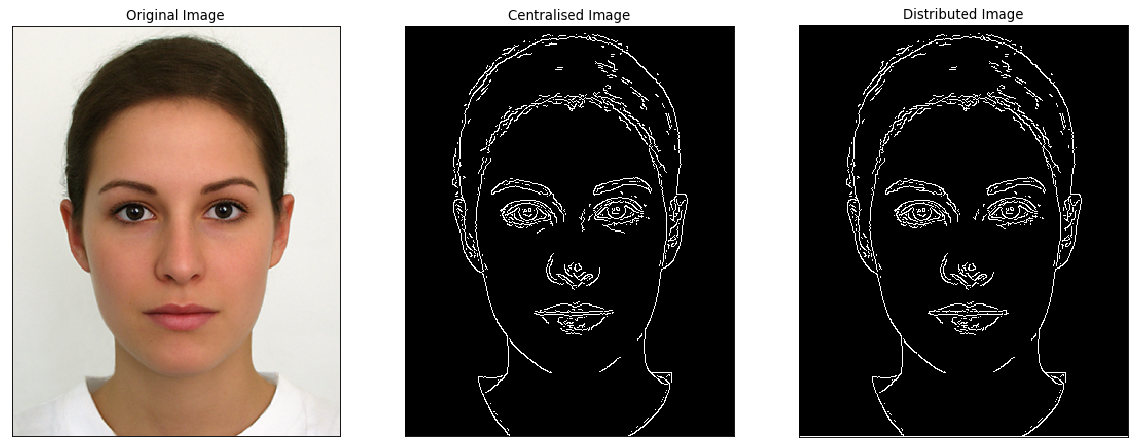

In [6]:
""" Edge Detection call """

edgeImg = readImageRGB("edge.jpg")
edge_central = edgeDetection(edgeImg)
part = 10
split = splitImage(edgeImg, part)
for i in split:
    print(i.shape)
edge_distributed = stitchImage(edgeImg, split, edgeDetection)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print3images(plt, edgeImg, edge_central, edge_distributed, "gray")
plt.show()



## Noise reduction using Median Blur

92160


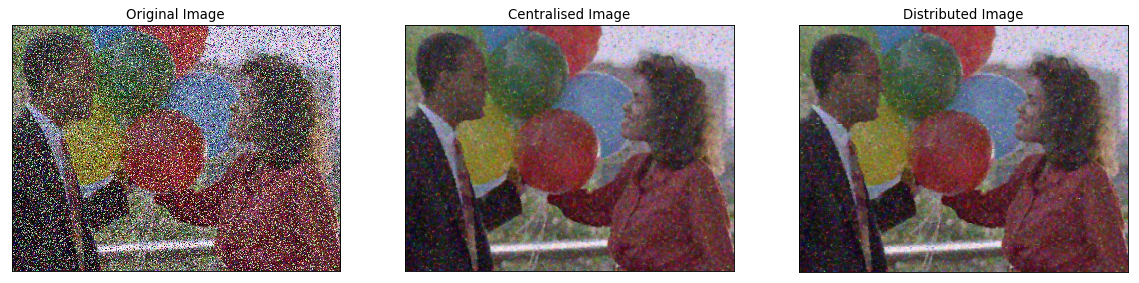

In [13]:
""" Noise reduction using Median Blur Call """
import json
medianImg = readImageRGB("noisy.jpg")
median_original = medianblur(medianImg)
# print("median shape {}".format(medianImg.shape))
part = 10
split = splitImage(medianImg, part)
print(split[1].size)
median_distributed = stitchImage(medianImg, split, medianblur)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print3images(plt, medianImg, median_original, median_distributed, 'gray')
plt.show()


## Noise reduction using Non-Local Means Denoising

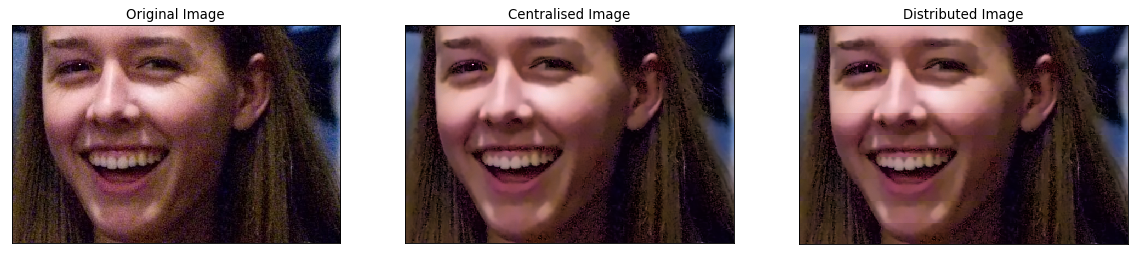

In [11]:
""" Noise reduction using Non Local Means Denoising """

noiseImg = readImageRGB("noise2.jpg")
noise_original = noisereduction(noiseImg)
part = 10
split = splitImage(noiseImg, part)
noise_distributed = stitchImage(noiseImg, split, noisereduction)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print3images(plt, noiseImg, noise_original, noise_distributed, 'gray')
plt.show()



##  Overlay Images

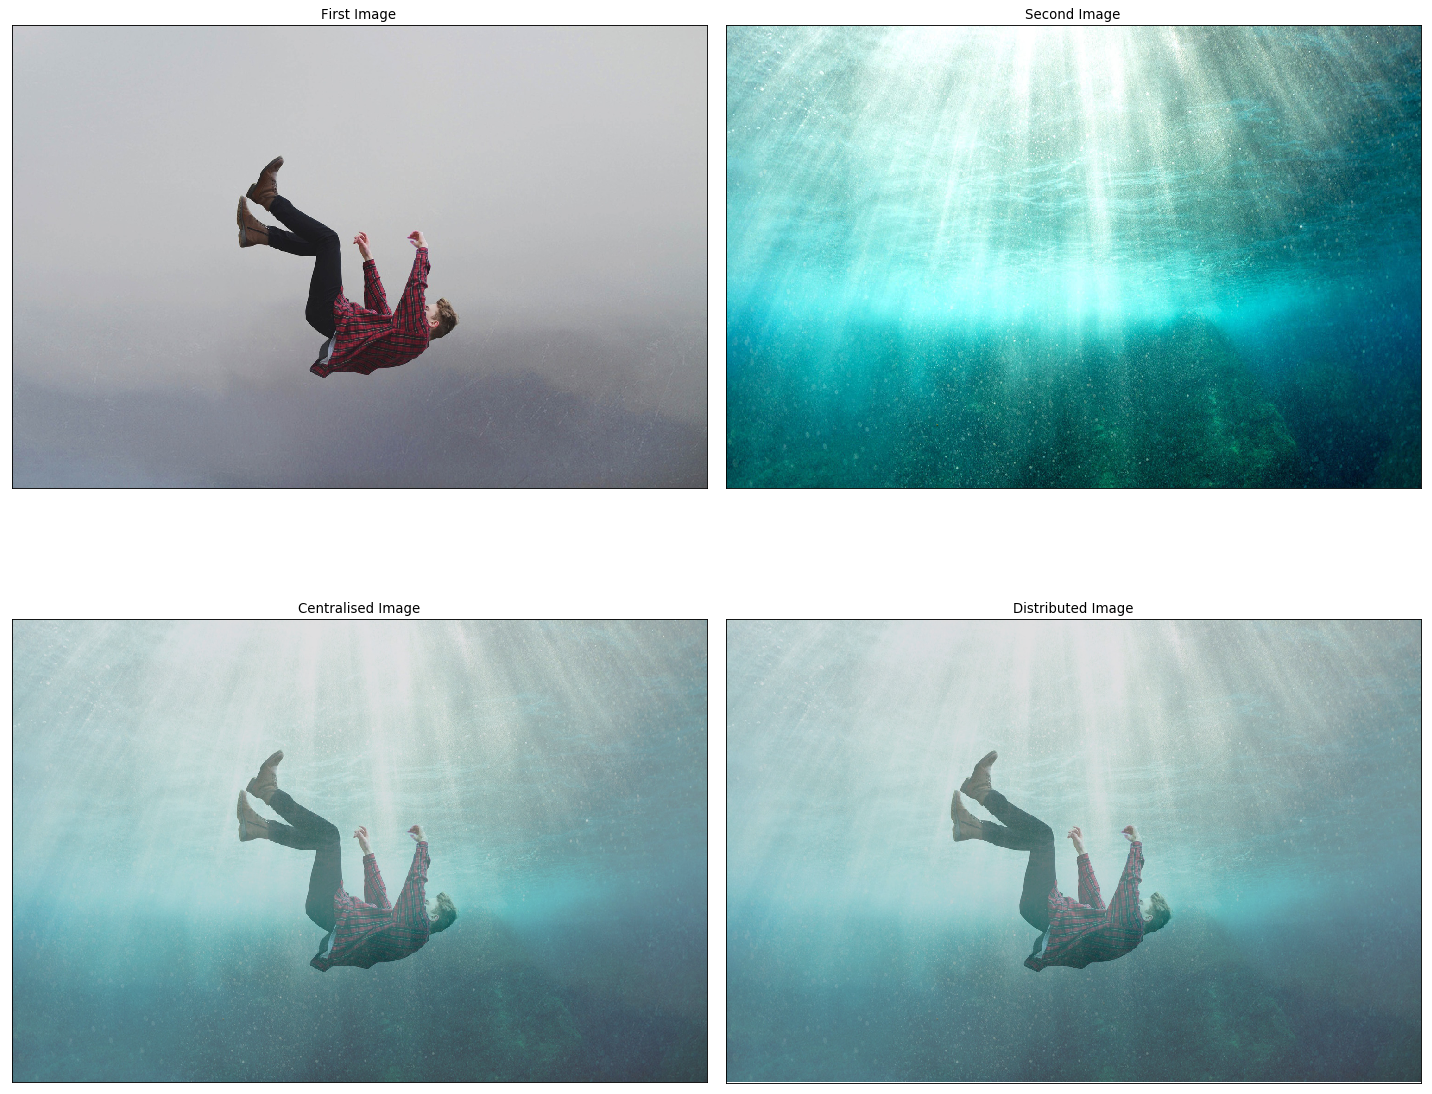

In [21]:

""" Overlay Images """

frontImage = readImageRGB("fall.jpg")
bgImage = readImageRGB("ocean.jpg")
# print(img2.shape)
overlayImage = overlay(frontImage, bgImage)
split = splitImage(frontImage, part)
bgsplit = splitImage(bgImage, part)
overlay_distributed = stitchmultimage(frontImage, bgImage, split, bgsplit,overlay)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print4images(plt, frontImage, bgImage, overlayImage, overlay_distributed,'gray')
plt.tight_layout()


## Face Detection

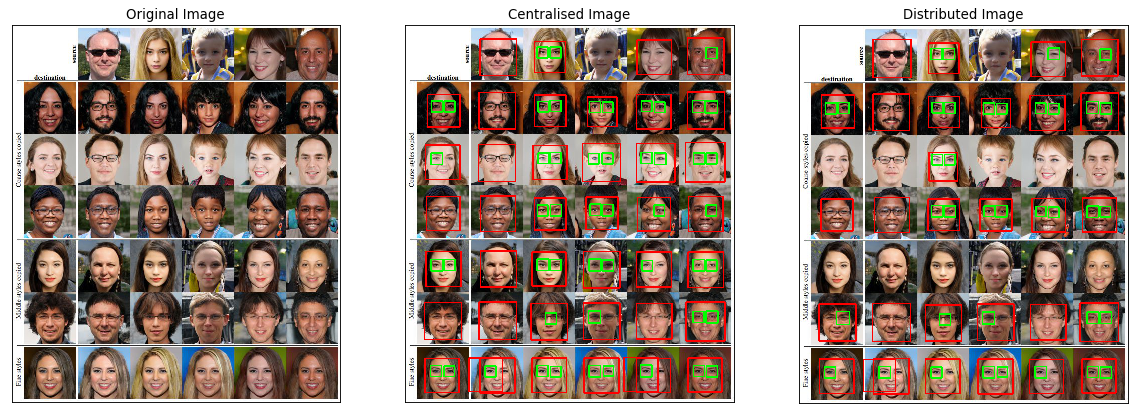

Finished


In [13]:

""" Face Detection """

faceImg = readImageRGB("faced.jpg")
faceImg_original = facedetect(faceImg)
part = 3
split = splitImage(faceImg, part)
faceImg_distributed = stitchImage(faceImg, split, facedetect)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print3images(plt, faceImg, faceImg_original, faceImg_distributed, 'gray')
plt.show()

print("Finished")